<strong>Installing Libraries</strong>

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

In [5]:
pip install pycaret

**Importing Libraries**

In [6]:
import pandas as pd

In [7]:
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt

In [9]:
import numpy as np

**Reading the dataset**

In [10]:
data = pd.read_csv('insurance.csv')
data.head(10) #reading the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [11]:
data.dtypes # determining datatypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
data.isnull().sum() #checking the null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
data.skew() #checking skewness

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

**Data Exploratory Analysis**

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Charges')

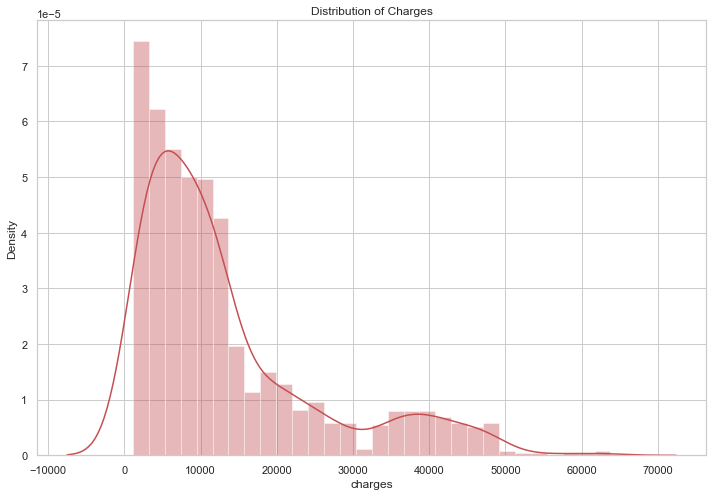

In [14]:
sns.set(style='whitegrid')  # distribution(skewnwss visualization) ---> EDA
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(data['charges'], kde = True, color = 'r')
plt.title('Distribution of Charges')

**Normalized Version**

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


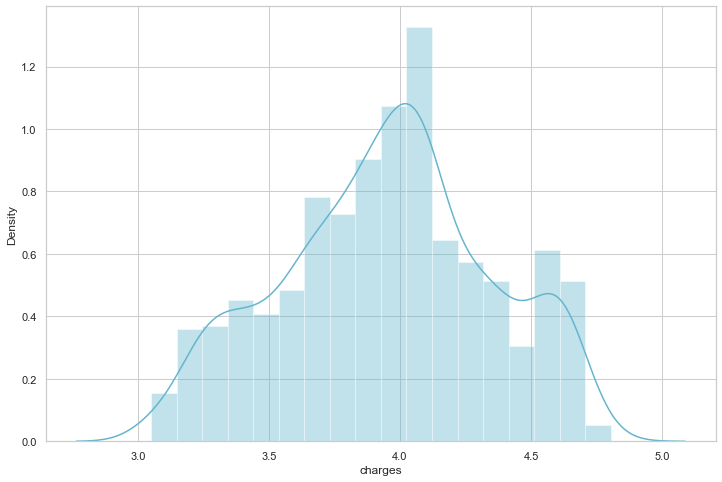

In [15]:
#This distribution is right-skewed. To make it closer to normal we can apply natural log
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(data['charges']), kde = True, color = 'c' )

**Plotting Charges Against Regions**

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


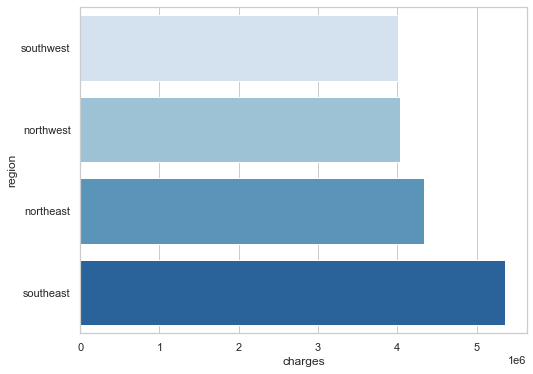

In [16]:
charges = data['charges'].groupby(data.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

**Plotting Charges Against Region with Gender Attribute**

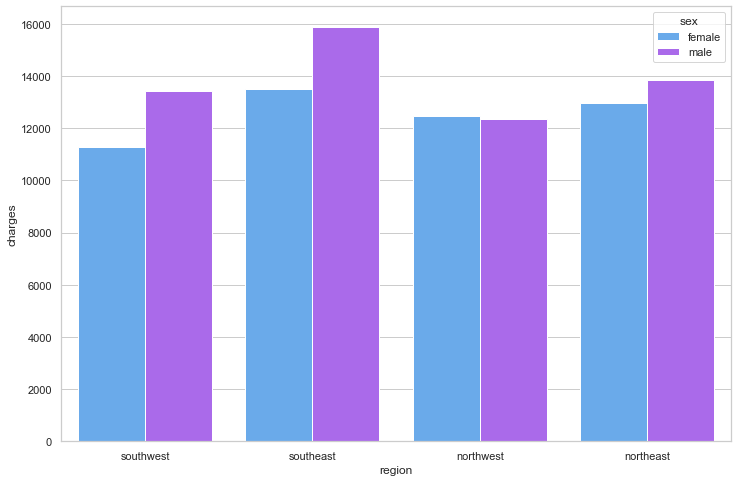

In [17]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', ci=None, hue='sex', data=data, palette='cool')

**Plotting Charges Against Region with Smoker Attribute**

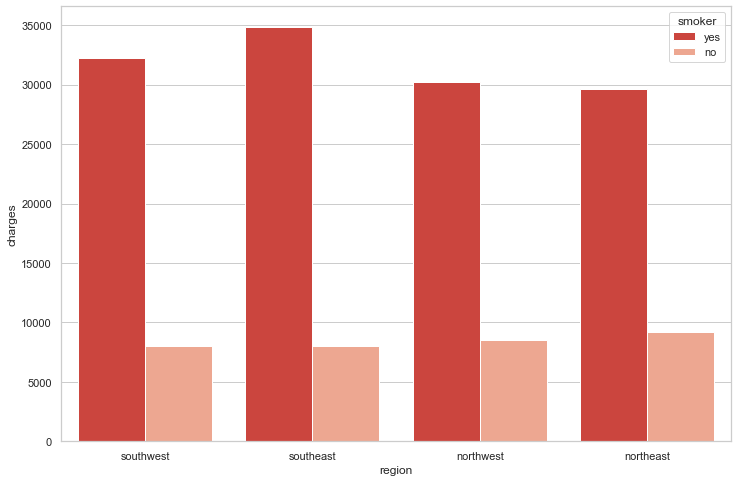

In [18]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', ci=None, data=data, palette='Reds_r')

**Plotting Charges Against Region with Children Attribute**

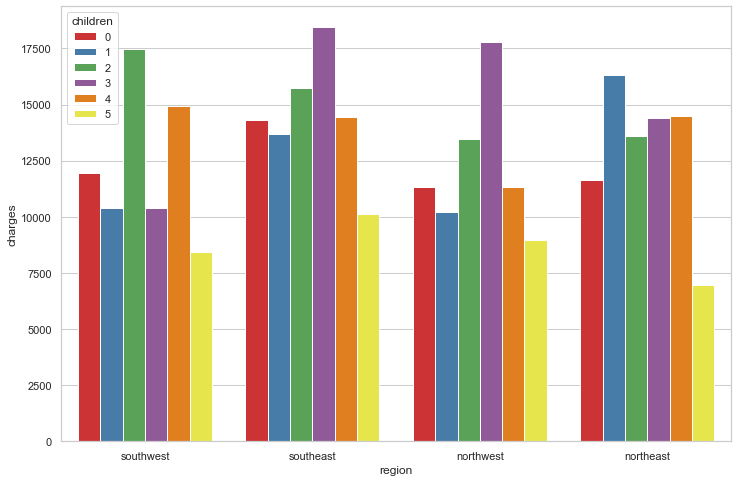

In [19]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', ci=None, hue='children', data=data, palette='Set1')

**Plotting Charges Against Age, BMI and Children With Smoker Attribute**

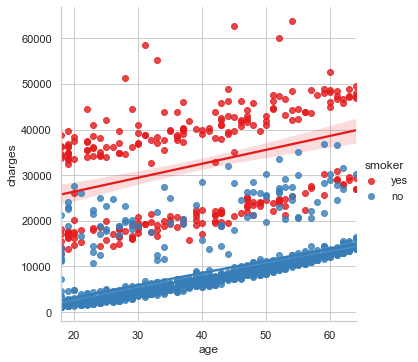

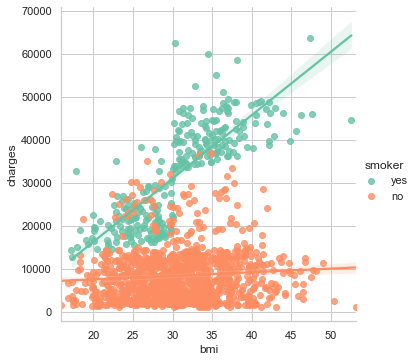

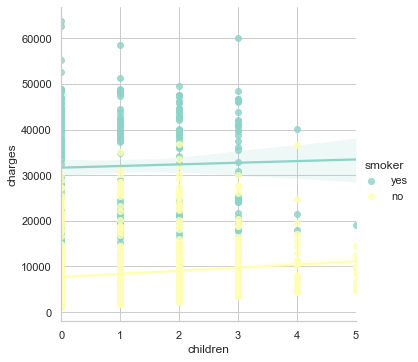

In [20]:
ax = sns.lmplot(x = 'age', y = 'charges', data=data, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=data, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=data, hue='smoker', palette='Set3')

**Data Encoding**

In [21]:
##Converting objects labels into categorical
data[['sex', 'smoker', 'region']] = data[['sex', 'smoker', 'region']].astype('category')
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [22]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(data.sex.drop_duplicates())
data.sex = label.transform(data.sex)
label.fit(data.smoker.drop_duplicates())
data.smoker = label.transform(data.smoker)
label.fit(data.region.drop_duplicates())
data.region = label.transform(data.region)
data.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

**Plotting the Correlation Heatmap**

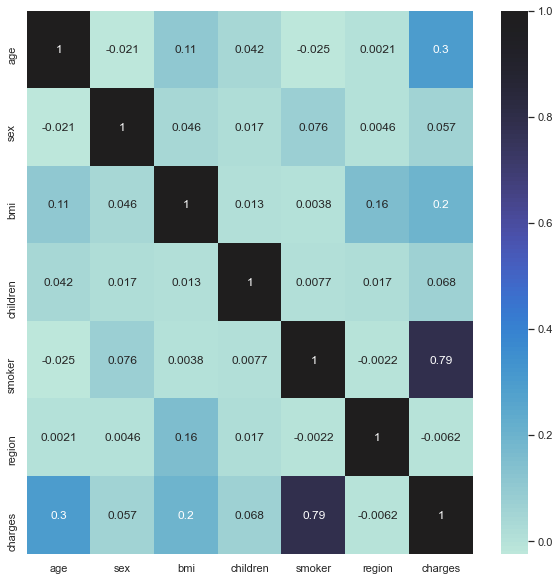

In [23]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(data.corr(), annot=True, center=1)

In [24]:
#importing the pycaret library
from pycaret.regression import *
reg1 = setup(data, target = 'charges', normalize= True, session_id=123, log_experiment=True, feature_selection = True, experiment_name='insurance1')

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 11)"


**Model creation and R2 plotting For Four models:**
1. Gradient Boosting Regressor
2. Lasso Regression
3. AdaBoost Regressor
4. Elastic Net 

In [25]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2617.0129,20192216.6177,4493.5750,0.8794,0.4191,0.3113
1,3084.2064,32314810.4860,5684.6117,0.8121,0.4641,0.3035
2,2568.2472,21531184.3994,4640.1707,0.7274,0.4793,0.3183
3,2854.0561,21598718.9599,4647.4422,0.8197,0.4632,0.3642
4,2828.7269,27142311.8928,5209.8284,0.7981,0.5089,0.3317
5,2607.5567,19517328.8881,4417.8421,0.8745,0.3469,0.2460
6,2477.7329,19387355.1888,4403.1074,0.8681,0.3611,0.2882
7,2689.9898,24564073.5966,4956.2157,0.8649,0.4296,0.2676
8,2395.8654,19112314.1616,4371.7633,0.8766,0.4234,0.3360
9,2939.9634,27278651.7244,5222.8969,0.8243,0.5395,0.3887


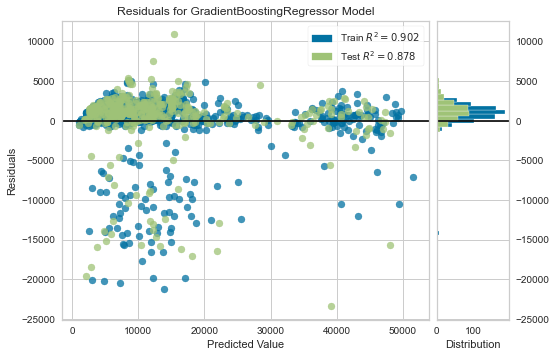

In [26]:
plot_model(gbr)

In [27]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4151.7870,32776212.2086,5725.0513,0.8042,0.4783,0.4162
1,4502.0604,43742971.6578,6613.8470,0.7457,0.5576,0.4252
2,3814.7059,31233539.8953,5588.6975,0.6045,0.6994,0.4226
3,3752.3769,26850697.1209,5181.7658,0.7758,0.5073,0.5255
4,4462.5406,43365712.0355,6585.2648,0.6775,0.5202,0.3751
5,4189.5967,36234659.1015,6019.5232,0.7669,0.7018,0.4327
6,4077.2449,39190093.2966,6260.1991,0.7333,0.8500,0.4228
7,4900.1711,45983322.3150,6781.1004,0.7472,0.6547,0.4110
8,4593.8386,40230702.4005,6342.7677,0.7401,0.6648,0.5064
9,4604.9270,41895598.4609,6472.6809,0.7301,0.7150,0.4644


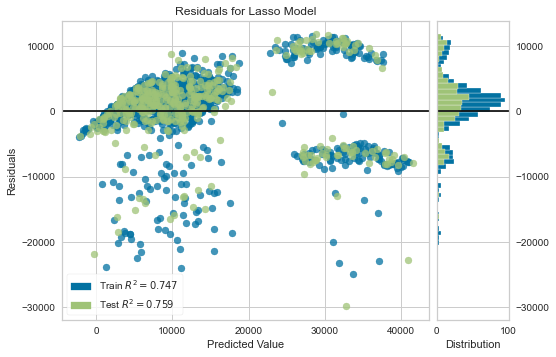

In [28]:
plot_model(lasso)

In [29]:
ada= create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3796.0042,22772081.8058,4772.0102,0.8640,0.5809,0.6449
1,4107.2399,32484304.7699,5699.5004,0.8111,0.5546,0.5501
2,4248.8474,26199109.3610,5118.5066,0.6683,0.7100,0.8922
3,4665.9538,30999920.8417,5567.7573,0.7412,0.7333,0.9607
4,4287.6694,28949291.1749,5380.4546,0.7847,0.6100,0.6682
5,4230.6247,27337266.9748,5228.5052,0.8241,0.5813,0.6503
6,3845.1950,26179046.3164,5116.5463,0.8219,0.6093,0.7003
7,4241.6379,27987764.9833,5290.3464,0.8461,0.6476,0.7485
8,3882.9707,26957549.0992,5192.0660,0.8259,0.6656,0.7495
9,3595.9822,26801666.8902,5177.0326,0.8274,0.5881,0.5751


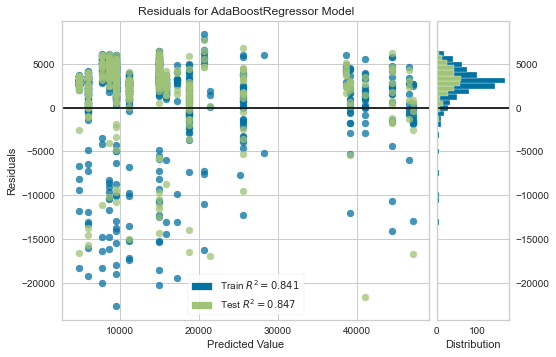

In [30]:
plot_model(ada)

In [31]:
en = create_model('en')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7680.4539,99468625.0164,9973.3959,0.4059,0.7770,1.0145
1,8097.5938,108725537.2052,10427.1538,0.3678,0.7675,0.9678
2,6075.4562,52084614.9139,7216.9672,0.3405,0.8201,1.1617
3,7093.1903,76010689.4704,8718.4109,0.3653,0.8665,1.2667
4,7204.7008,89054315.9638,9436.8594,0.3377,0.7511,0.9423
5,7219.3626,96491645.4230,9823.0161,0.3793,0.6957,0.8384
6,7159.6147,91828347.4188,9582.7109,0.3752,0.7814,1.0342
7,8198.8343,113684674.0541,10662.3015,0.3749,0.7992,1.0180
8,7789.3394,101338762.9282,10066.7156,0.3454,0.8449,1.1775
9,7374.5218,90892861.4408,9533.7748,0.4146,0.8147,1.0799


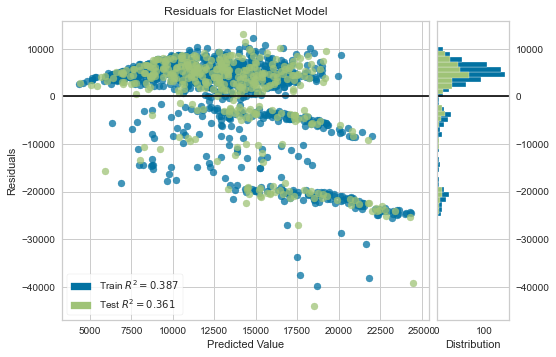

In [32]:
plot_model(en)

In [33]:
tunned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3467.5989,29217436.2206,5405.3156,0.8255,0.6044,0.4907
1,3510.9099,33752242.8665,5809.6681,0.8038,0.4905,0.3831
2,3585.9702,34563198.2707,5879.0474,0.5624,0.6927,0.5260
3,3570.0728,30270591.7277,5501.8717,0.7472,0.6344,0.5811
4,4040.5223,41284082.0137,6425.2690,0.6929,0.8093,0.5220
5,3399.1925,28152961.6047,5305.9364,0.8189,0.4568,0.3539
6,3307.7875,25735908.3229,5073.0571,0.8249,0.6812,0.4152
7,3191.0047,27893828.1768,5281.4608,0.8466,0.5609,0.3352
8,2853.4060,22192117.3548,4710.8510,0.8567,0.5704,0.4825
9,3691.1826,38132103.8143,6175.1197,0.7544,0.8113,0.5141


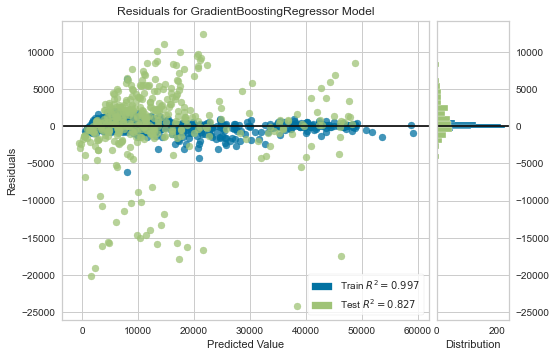

In [34]:
plot_model(tunned_gbr)

In [35]:
tunned_lasso = tune_model(lasso)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4164.8867,32886524.9219,5734.6774,0.8036,0.4744,0.4184
1,4494.4702,43751596.3056,6614.4989,0.7456,0.5544,0.4232
2,3811.2792,31102014.7564,5576.9180,0.6062,0.7687,0.4238
3,3763.5812,27031662.6917,5199.1983,0.7743,0.5060,0.5265
4,4471.8699,43345371.7851,6583.7202,0.6776,0.5200,0.3783
5,4179.8093,36205546.6981,6017.1045,0.7671,0.6340,0.4295
6,4078.0867,39175670.5002,6259.0471,0.7334,0.6818,0.4231
7,4892.3162,45774982.6163,6765.7211,0.7483,0.5940,0.4111
8,4593.3095,40348314.9345,6352.0323,0.7394,0.7431,0.5063
9,4591.1511,41689076.0062,6456.7078,0.7315,0.6832,0.4630


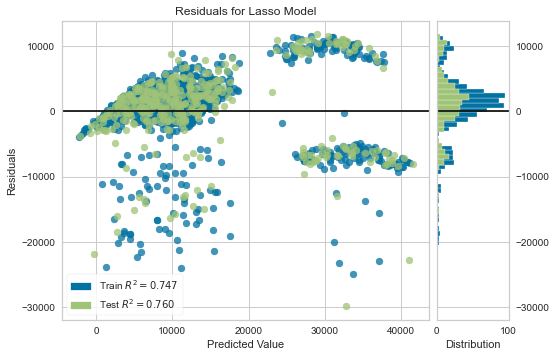

In [36]:
plot_model(tunned_lasso)

In [37]:
tunned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2613.3394,19537097.9044,4420.0789,0.8833,0.4389,0.3556
1,3339.6380,32515051.4572,5702.1971,0.8109,0.4952,0.3710
2,2840.4686,22802212.4915,4775.1662,0.7113,0.5032,0.4203
3,2790.6304,20871659.9305,4568.5512,0.8257,0.4886,0.4465
4,2966.7519,25731012.5768,5072.5746,0.8086,0.4750,0.3342
5,2782.0334,19638074.6849,4431.4867,0.8737,0.4056,0.3179
6,2616.3331,20632464.8538,4542.2973,0.8596,0.4349,0.3717
7,2891.2763,24954066.9498,4995.4046,0.8628,0.4725,0.3368
8,2827.6461,21790773.7528,4668.0589,0.8593,0.4801,0.3996
9,2909.7713,25757703.9240,5075.2048,0.8341,0.5172,0.3948


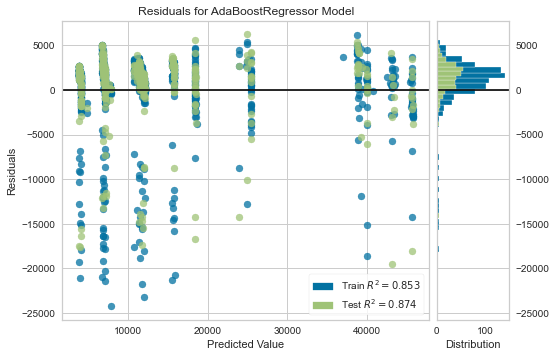

In [38]:
plot_model(tunned_ada)

In [39]:
tunned_en = tune_model(en)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7586.0036,97116845.2824,9854.7879,0.4199,0.7687,0.9989
1,8006.9450,106509915.6972,10320.3641,0.3807,0.7594,0.9520
2,5995.5134,50988729.6674,7140.6393,0.3544,0.8109,1.1391
3,7006.6308,74354848.4642,8622.9257,0.3791,0.8570,1.2446
4,7125.5597,87380618.4004,9347.7601,0.3501,0.7438,0.9273
5,7129.6995,94461036.4148,9719.1068,0.3924,0.6861,0.8214
6,7064.9415,89877888.8645,9480.3950,0.3884,0.7729,1.0169
7,8092.3400,111172751.8517,10543.8490,0.3887,0.7904,1.0001
8,7694.2304,99294427.1048,9964.6589,0.3587,0.8363,1.1578
9,7284.6836,88857328.9705,9426.4165,0.4277,0.8062,1.0604


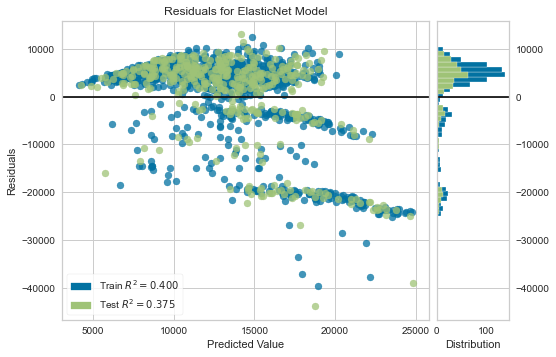

In [40]:
plot_model(tunned_en)

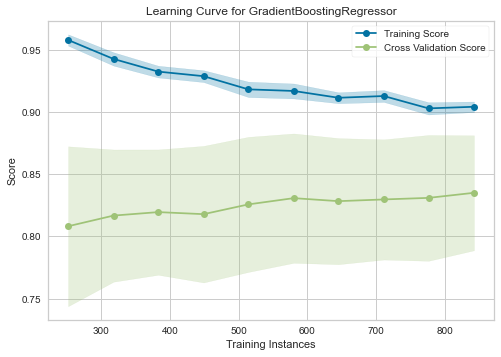

In [41]:
plot_model(gbr, plot = 'learning')

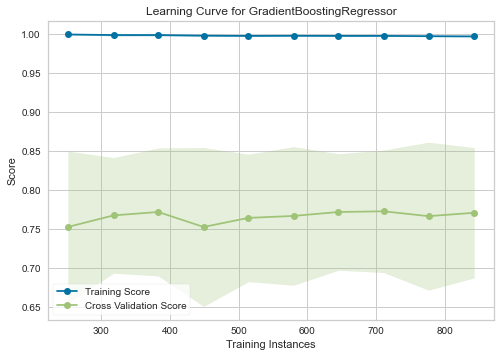

In [42]:
plot_model(tunned_gbr, plot = 'learning')

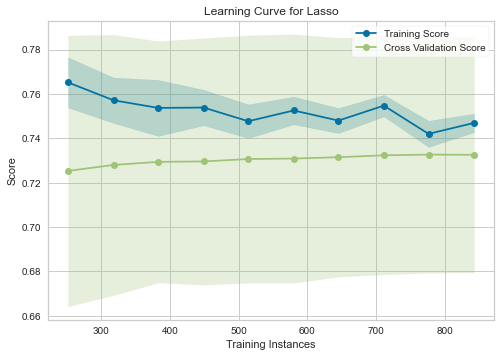

In [43]:
plot_model(lasso, plot = 'learning')

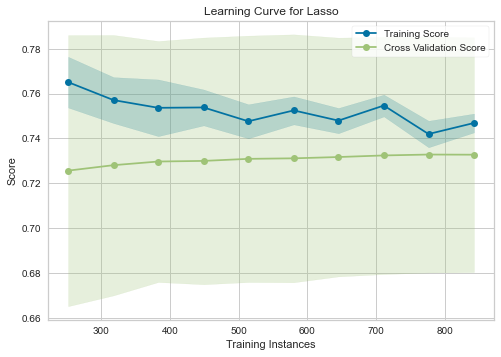

In [44]:
plot_model(tunned_lasso, plot = 'learning')

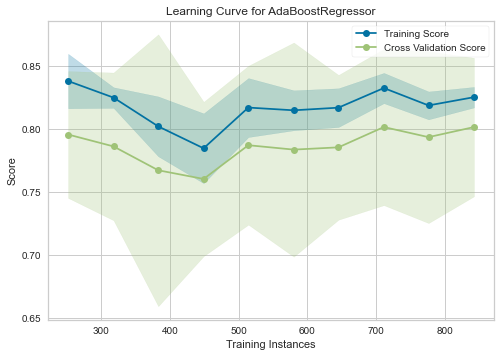

In [45]:
plot_model(ada, plot = 'learning')

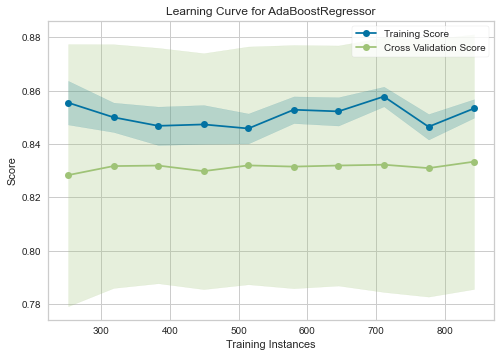

In [46]:
plot_model(tunned_ada, plot = 'learning')

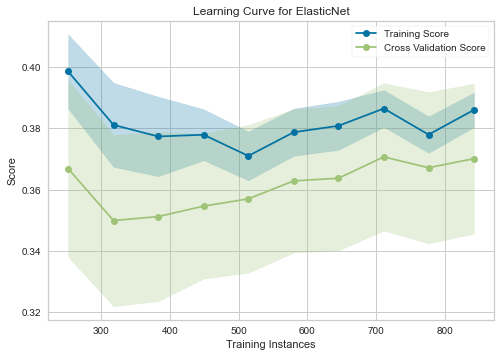

In [47]:
plot_model(en, plot = 'learning')

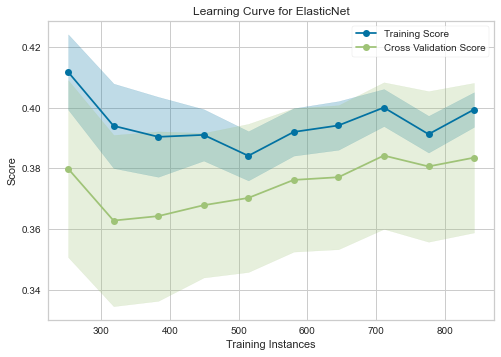

In [48]:
plot_model(tunned_en, plot = 'learning')

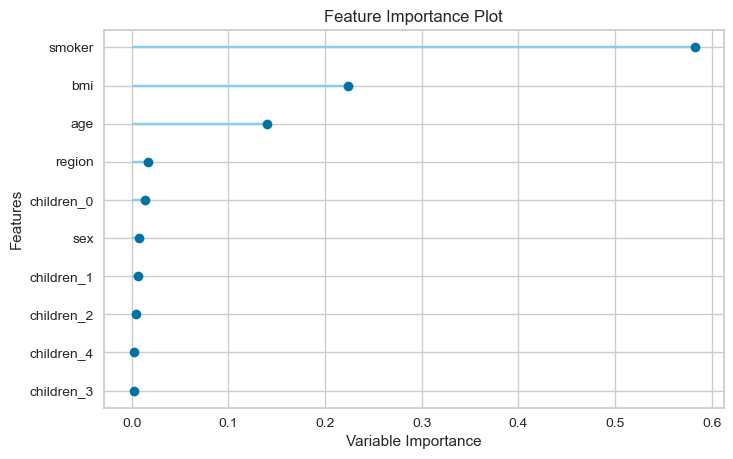

In [49]:
plot_model(tunned_gbr, plot = 'feature')

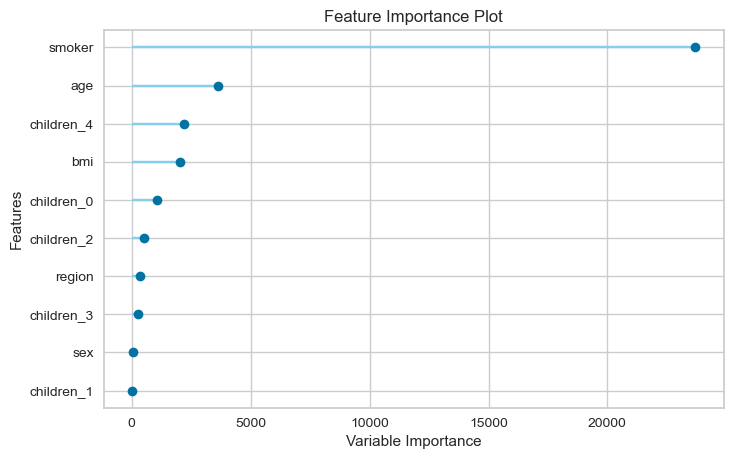

In [50]:
plot_model(tunned_lasso, plot = 'feature')

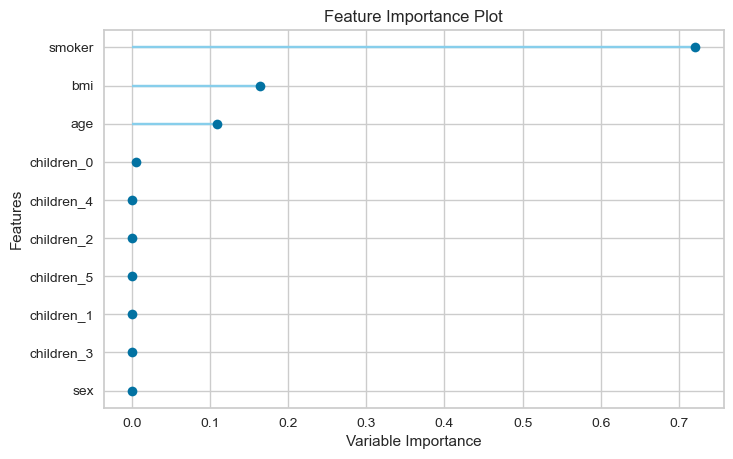

In [51]:
plot_model(tunned_ada, plot = 'feature')

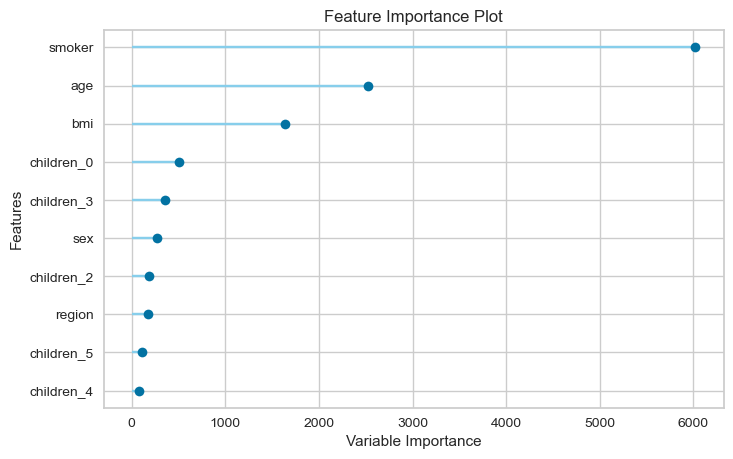

In [52]:
plot_model(tunned_en, plot = 'feature')